## Train a  Bernoulli-Bernoulli RBM (BBRBM) to reconstruct img

In [1]:
import numpy as np
import timeit
from tfrbm.bbrbm import BBRBM
import matplotlib.pyplot as plt

In [2]:
bm = BBRBM(n_visible=36,n_hidden= 56)
bm.image_height = 6

### dataset[i][0] xor dataset[i][1] = dataset[i][2]

In [3]:
f = open("6x6.txt")
dataset = np.array([[int(data) for data in f.read() if data in "01"]])

plt.figure()
plt.imshow(dataset[0].reshape(bm.image_height, -1))

Stopped training early because the model can reconstruct the inputs


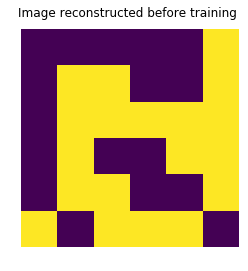

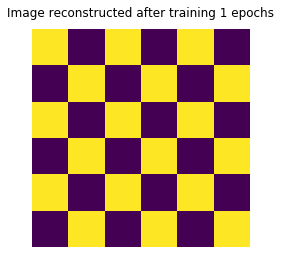

In [4]:
err = bm.fit(dataset, n_epoches=50, learning_rate = 1000, decay = 0.01, epochs_to_test = 1)

### Measure calculation time on CPU

In [5]:
import time

In [6]:
start_time = time.time()
bm.sess.run(bm.hidden_p, feed_dict={bm.x: dataset})
hidden_elapsed_time = time.time() - start_time
print "Time to calculate hidden nodes:",hidden_elapsed_time

start_time = time.time()
bm.sess.run(bm.visible_recon_p, feed_dict={bm.x: dataset})
visible_elapsed_time = time.time() - start_time - hidden_elapsed_time
print "Time to reconstruct visible nodes:",visible_elapsed_time

Time to calculate hidden nodes: 0.00558400154114
Time to reconstruct visible nodes: 0.00405502319336


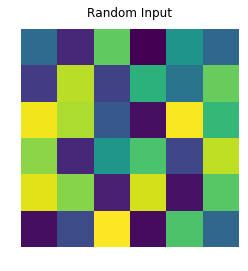

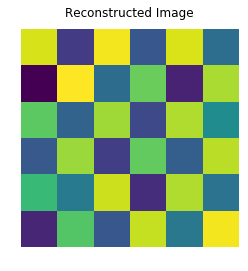

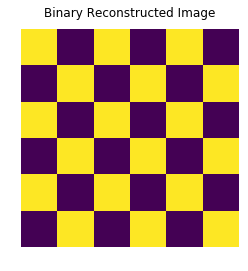

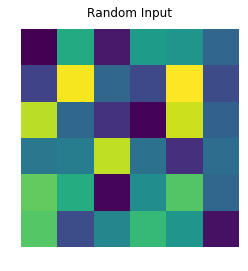

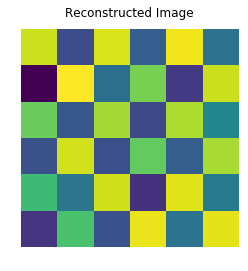

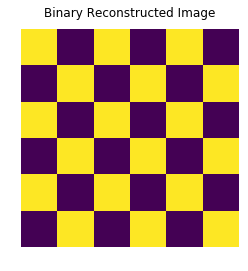

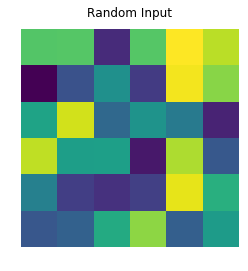

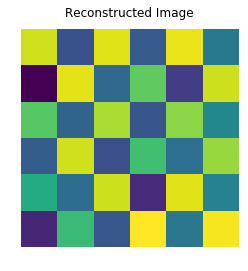

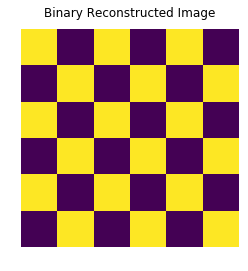

In [7]:
for i in range(3):
    random_data = np.random.rand(dataset.shape[0],dataset.shape[1])

    plt.figure()
    plt.axis('off')
    plt.title("Random Input", y=1.03)
    plt.imshow(random_data.reshape(bm.image_height, -1))
    samples = bm.reconstruct(random_data)
    sample = samples[0]
    plt.figure()
    plt.axis('off')
    plt.title("Reconstructed Image", y=1.03)
    plt.imshow(sample.reshape(bm.image_height, -1))
    sample = sample > 0.5
    plt.figure()
    plt.axis('off')
    plt.title("Binary Reconstructed Image", y=1.03)
    plt.imshow(sample.reshape(bm.image_height, -1))